# Thyroid Disease Dataset

### Import Packages

In [33]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

### Importing Dataset 

In [5]:
rawfile = r'E:\\Programming languages\\Machine Learning\\Data Gathering & Processing\\03_Thyroid_disease\\allbp.data'
df = pd.read_csv(rawfile) # Reading Dataset
df.head()

,41,F,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,...,t.2,125,t.3,1.14,t.4,109,f.14,?,SVHC,negative.|3733
0,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
1,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
2,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
3,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
4,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.|3434


### Information about Attributes
- Column names are not assigned, it is considering 1st instance data as column name so we will be assigning columns to dataset.
- As shown below all attributes are Object Dtype so we will be using Encoding to convert them into numerical Dtype.

In [6]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   41              2799 non-null   object
 1   F               2799 non-null   object
 2   f               2799 non-null   object
 3   f.1             2799 non-null   object
 4   f.2             2799 non-null   object
 5   f.3             2799 non-null   object
 6   f.4             2799 non-null   object
 7   f.5             2799 non-null   object
 8   f.6             2799 non-null   object
 9   f.7             2799 non-null   object
 10  f.8             2799 non-null   object
 11  f.9             2799 non-null   object
 12  f.10            2799 non-null   object
 13  f.11            2799 non-null   object
 14  f.12            2799 non-null   object
 15  f.13            2799 non-null   object
 16  t               2799 non-null   object
 17  1.3             2799 non-null   object
 18  t.1     

### Assigning columns

In [9]:
df_columns = [
    'age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
    'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured:', 'TT4',
    'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG',
    'referral source','negative'
]

df.columns = df_columns
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured:,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,negative
0,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
1,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
2,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
3,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
4,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.|3434


### Splitting into Features and label

In [10]:
df_features = df.drop('negative',axis=1)
df_label = df[['negative']]

### Information about Features & Label

In [11]:
print(df_features.info())
print(df_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2799 non-null   object
 1   sex                        2799 non-null   object
 2   on thyroxine               2799 non-null   object
 3   query on thyroxine         2799 non-null   object
 4   on antithyroid medication  2799 non-null   object
 5   sick                       2799 non-null   object
 6   pregnant                   2799 non-null   object
 7   thyroid surgery            2799 non-null   object
 8   I131 treatment             2799 non-null   object
 9   query hypothyroid          2799 non-null   object
 10  query hyperthyroid         2799 non-null   object
 11  lithium                    2799 non-null   object
 12  goitre                     2799 non-null   object
 13  tumor                      2799 non-null   object
 14  hypopitu

### Checking for N-Unique Values in Features
- Below Table shows, column name and Unique categorical value presented in it.
- For Ex. Sex 2 (Means, Male & Female)

In [14]:
df_feature_nunique = df_features.nunique()
df_label_nunique = df_label.nunique()
print(df_label_nunique)
print(df_feature_nunique)

negative    2799
dtype: int64
age                           94
sex                            3
on thyroxine                   2
query on thyroxine             2
on antithyroid medication      2
sick                           2
pregnant                       2
thyroid surgery                2
I131 treatment                 2
query hypothyroid              2
query hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH measured                   2
TSH                          264
T3 measured                    2
T3                            65
TT4 measured:                  2
TT4                          218
T4U measured                   2
T4U                          139
FTI measured                   2
FTI                          210
TBG measured                   1
TBG                            1
referral source                5
dtype: int64


### Performing Encoding on Features
- For encoding of Features we will be using OrdinalEncoder() from sklearn.preprocessing.
- For encoding of label we will be using LabelEncoder() from sklearn.preprocessing.
- As shown below once we have applied OrdinalEncoder() on features, all the features have converted from Object to float64

In [26]:
ordinal_encoder = OrdinalEncoder()
df_features_encoded = ordinal_encoder.fit_transform(df_features)
df_features_encoded = pd.DataFrame(df_features_encoded,columns=df_features.columns)
print(df_features_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2799 non-null   float64
 2   on thyroxine               2799 non-null   float64
 3   query on thyroxine         2799 non-null   float64
 4   on antithyroid medication  2799 non-null   float64
 5   sick                       2799 non-null   float64
 6   pregnant                   2799 non-null   float64
 7   thyroid surgery            2799 non-null   float64
 8   I131 treatment             2799 non-null   float64
 9   query hypothyroid          2799 non-null   float64
 10  query hyperthyroid         2799 non-null   float64
 11  lithium                    2799 non-null   float64
 12  goitre                     2799 non-null   float64
 13  tumor                      2799 non-null   float

### Performing Encoding on Label

In [28]:
label_encoder = LabelEncoder()
df_label_encoded = label_encoder.fit_transform(df_label['negative'])
df_label_encoded = pd.DataFrame(df_label_encoded,columns=df_label.columns)
print(df_label_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   negative  2799 non-null   int32
dtypes: int32(1)
memory usage: 11.1 KB
None


### Describing Features 
- Using describe() we are getting, Estimate of Location, Estimate of Variability etc.

In [29]:
df_features_describe = df_features_encoded.describe()
print(df_features_describe)

               age          sex  on thyroxine  query on thyroxine  \
count  2799.000000  2799.000000   2799.000000         2799.000000   
mean     46.493748     1.267953      0.117899            0.014291   
std      20.800231     0.524263      0.322546            0.118708   
min       0.000000     0.000000      0.000000            0.000000   
25%      29.000000     1.000000      0.000000            0.000000   
50%      50.000000     1.000000      0.000000            0.000000   
75%      63.000000     2.000000      0.000000            0.000000   
max      93.000000     2.000000      1.000000            1.000000   

       on antithyroid medication         sick     pregnant  thyroid surgery  \
count                2799.000000  2799.000000  2799.000000      2799.000000   
mean                    0.012147     0.039300     0.014648         0.013934   
std                     0.109562     0.194342     0.120161         0.117236   
min                     0.000000     0.000000     0.000000    

### Checking for Outliers
- As shown in below box plot, T4U features contains plenty of outliers, Which likely to affect our machine learning model, so we will be removing those outliers, and for that we will be applying removing outliers formula on entire dataset.

<AxesSubplot: >

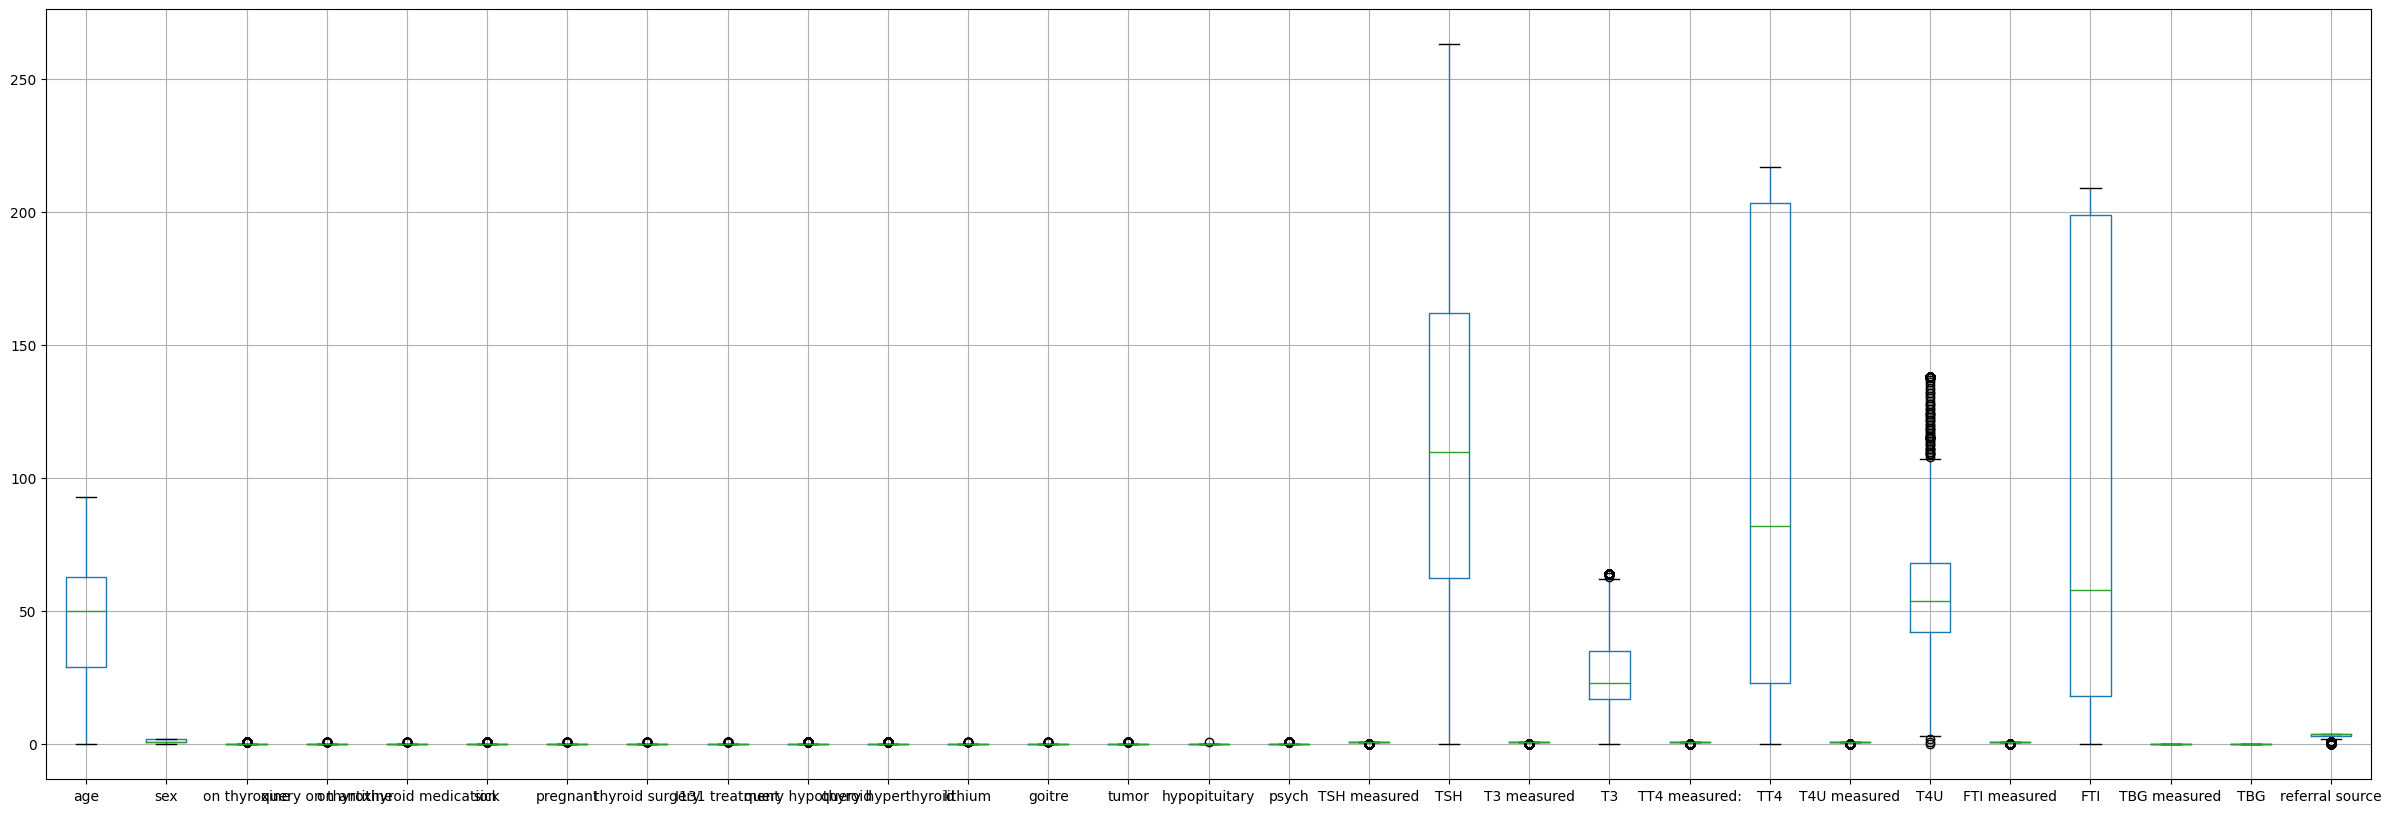

In [41]:
plt.figure(figsize=(30,10))
df_features_encoded.boxplot()

### Removing Outliers
- For Outliers of each column in feature Dataframe, below 25% and above 75% will be removed.

In [52]:
Q1 = df_features_encoded.quantile(0.25)
Q3 = df_features_encoded.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

df_features_no_outliers = df_features_encoded[(df_features_encoded >= lower_bound) & (df_features_encoded <= upper_bound)]

### Checking for Outliers (After removed)
- As shown below once we have removed all the outliers now we could apply this data on machine learnign model after normalization.

<AxesSubplot: >

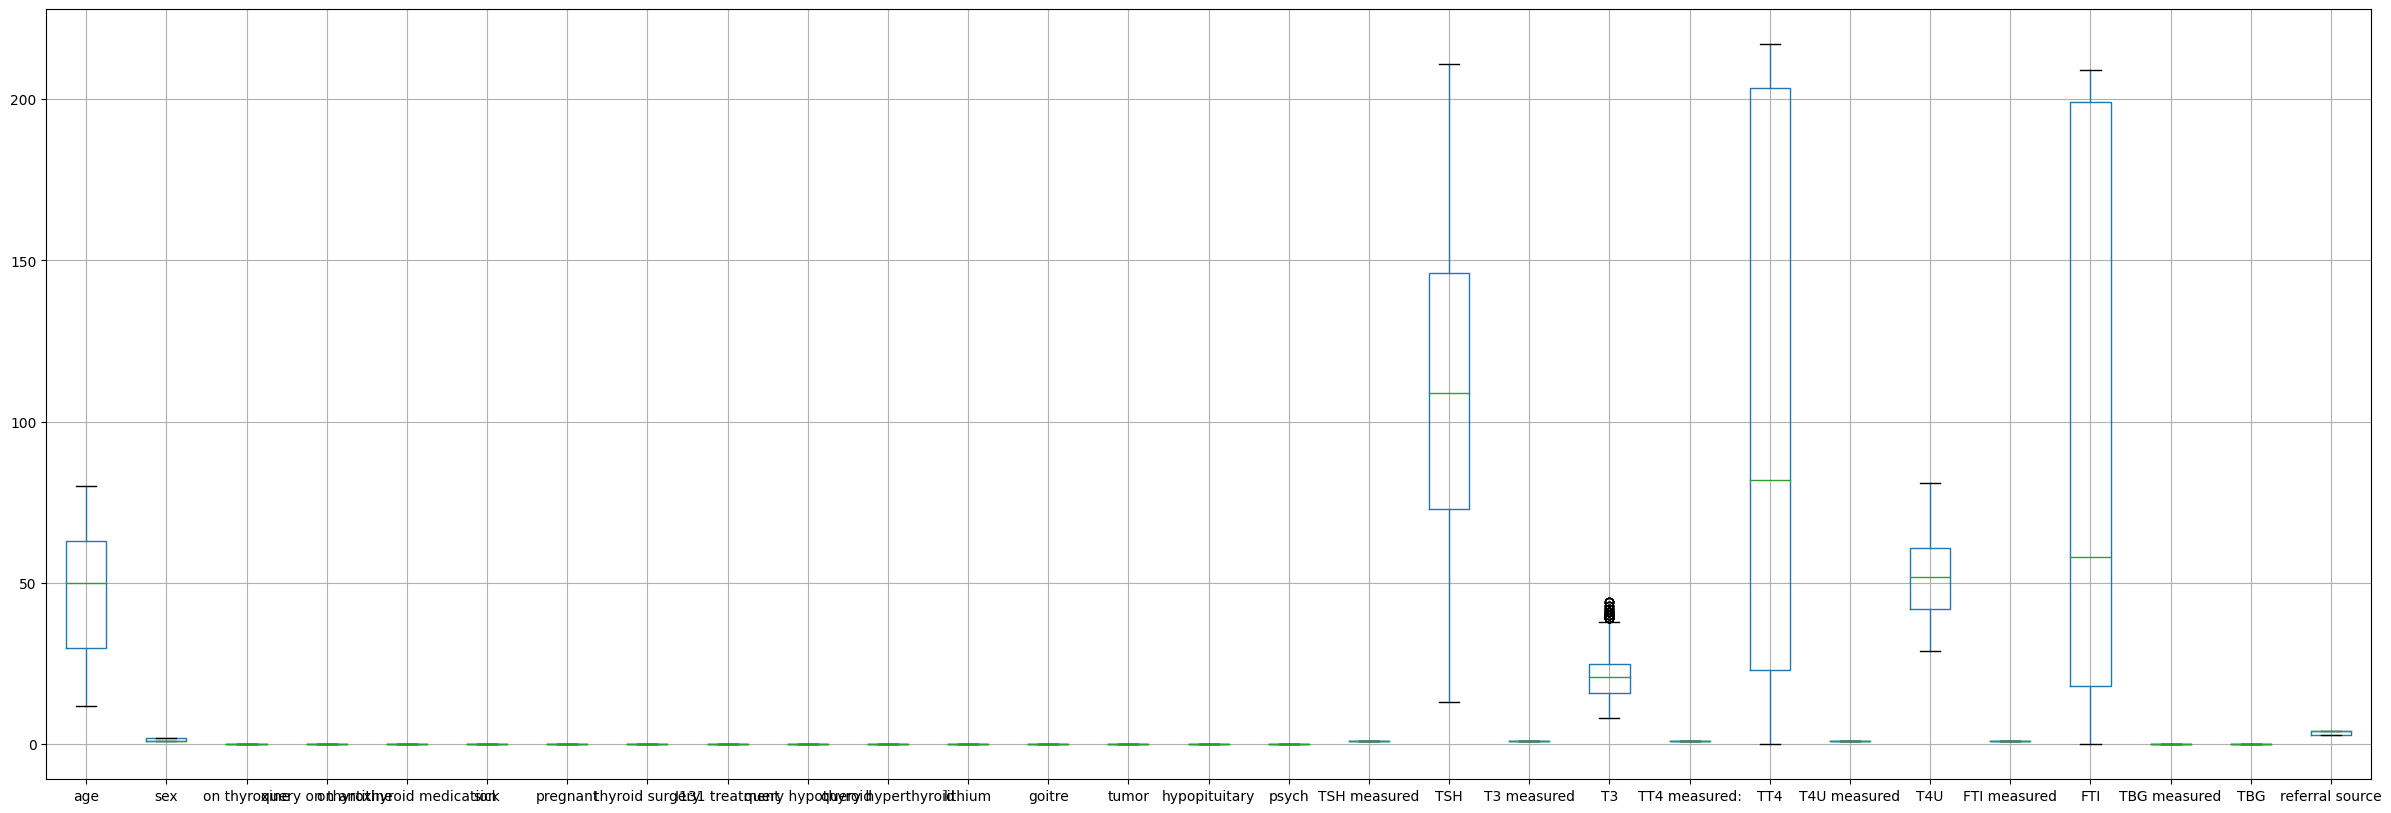

In [53]:
plt.figure(figsize=(30,10))
df_features_no_outliers.boxplot()

### Applying Normalization on Numeric data
- For normalization of numeric data we will be using MinMaxScaler() from sklearn.preprocessing

In [32]:
minMax_scaler = MinMaxScaler()
df_features_scaled = minMax_scaler.fit_transform(df_features_encoded)
df_features_scaled = pd.DataFrame(df_features_scaled,columns=df_features.columns)

### `NOTE:` Required preprocessing has done, you could make some changes by pulling this repository for more visit: www.github.com/itechdp